In [1]:
import random, time, os, sys, json
from tqdm import tqdm

In [2]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [4]:
'''
{2: [2],
 4: [2, 4],
 8: [2, 8],
 16: [2, 4, 16],
 32: [2, 32],
 64: [2, 4, 8, 64],
 128: [2, 128],
 256: [2, 4, 16, 256],
 512: [2, 8, 512],
 1024: [2, 4, 32, 1024],
 2048: [2, 2048],
 4096: [2, 4, 8, 16, 64, 4096],
 8192: [2, 8192],
 16384: [2, 4, 128, 16384]}
 '''

'\n{2: [2],\n 4: [2, 4],\n 8: [2, 8],\n 16: [2, 4, 16],\n 32: [2, 32],\n 64: [2, 4, 8, 64],\n 128: [2, 128],\n 256: [2, 4, 16, 256],\n 512: [2, 8, 512],\n 1024: [2, 4, 32, 1024],\n 2048: [2, 2048],\n 4096: [2, 4, 8, 16, 64, 4096],\n 8192: [2, 8192],\n 16384: [2, 4, 128, 16384]}\n '

In [6]:
bench_dict = {}

PREFIX = ""
# PREFIX = "r-LN-"
# PREFIX = "r-BN-"
# PREFIX = "r-LN-Rand-"
# PREFIX = "r-BN-Rand-"

def load_json(model_name):
    fil = f'./models/stats/{PREFIX+model_name}_stats.json'
#     fil = f'./models/stats_v1/{PREFIX+model_name}_stats.json'
    if not os.path.exists(fil):
        print(f"File Not Found: {fil}")
        return
    with open(fil) as f:
        data = json.load(f)
    bench_dict[model_name] = data
    return

In [7]:
mlp_dims_scale = {
    64: [2, 4, 8],
    16: [2, 4, 8],
    8: [2, 4, 8],
    4: [4, 8, 16],
    2: [4, 8, 16],
}

pwlf_grid_size = [3, 5, 9]

SEEDS = [147, 258, 369]

def load_benchmark_cifar10():
    for seed in SEEDS:
        ## First test MLP with allowed dimension mixing
        for dim, hid_dim in mlp_dims_scale.items(): ## For 1024 these are the factors
            for hr in hid_dim:
                model_name = f"cifar10_BlockMLP_b{dim}_h{hr}_s{seed}"
                load_json(model_name)

            model_name = f"cifar10_SparseMLP_b{dim}_s{seed}"
            load_json(model_name)
            
            model_name = f"cifar10_SparseMLP_PWLF_b{dim}_s{seed}"
            load_json(model_name)
            
        for gsz in pwlf_grid_size:
            model_name = f"cifar10_PairPWLF_g{gsz}_s{seed}"
            load_json(model_name)
        
        model_name = f"cifar10_OrdinaryMLP_s{seed}"
        load_json(model_name)

In [8]:
load_benchmark_cifar10()

In [9]:
# bench_dict

In [10]:
list(bench_dict.keys())

['cifar10_BlockMLP_b64_h2_s147',
 'cifar10_BlockMLP_b64_h4_s147',
 'cifar10_BlockMLP_b64_h8_s147',
 'cifar10_SparseMLP_b64_s147',
 'cifar10_SparseMLP_PWLF_b64_s147',
 'cifar10_BlockMLP_b16_h2_s147',
 'cifar10_BlockMLP_b16_h4_s147',
 'cifar10_BlockMLP_b16_h8_s147',
 'cifar10_SparseMLP_b16_s147',
 'cifar10_SparseMLP_PWLF_b16_s147',
 'cifar10_BlockMLP_b8_h2_s147',
 'cifar10_BlockMLP_b8_h4_s147',
 'cifar10_BlockMLP_b8_h8_s147',
 'cifar10_SparseMLP_b8_s147',
 'cifar10_SparseMLP_PWLF_b8_s147',
 'cifar10_BlockMLP_b4_h4_s147',
 'cifar10_BlockMLP_b4_h8_s147',
 'cifar10_BlockMLP_b4_h16_s147',
 'cifar10_SparseMLP_b4_s147',
 'cifar10_SparseMLP_PWLF_b4_s147',
 'cifar10_BlockMLP_b2_h4_s147',
 'cifar10_BlockMLP_b2_h8_s147',
 'cifar10_BlockMLP_b2_h16_s147',
 'cifar10_SparseMLP_b2_s147',
 'cifar10_SparseMLP_PWLF_b2_s147',
 'cifar10_PairPWLF_g3_s147',
 'cifar10_PairPWLF_g5_s147',
 'cifar10_PairPWLF_g9_s147',
 'cifar10_OrdinaryMLP_s147',
 'cifar10_BlockMLP_b64_h2_s258',
 'cifar10_BlockMLP_b64_h4_s258',
 

## Filter out the best test acc ones

In [11]:
for k, v in bench_dict.items():
    print(k, max(v['test_acc']))

cifar10_BlockMLP_b64_h2_s147 68.02
cifar10_BlockMLP_b64_h4_s147 68.31
cifar10_BlockMLP_b64_h8_s147 68.44
cifar10_SparseMLP_b64_s147 65.35
cifar10_SparseMLP_PWLF_b64_s147 65.76
cifar10_BlockMLP_b16_h2_s147 68.72
cifar10_BlockMLP_b16_h4_s147 70.24
cifar10_BlockMLP_b16_h8_s147 71.01
cifar10_SparseMLP_b16_s147 65.82
cifar10_SparseMLP_PWLF_b16_s147 66.15
cifar10_BlockMLP_b8_h2_s147 68.44
cifar10_BlockMLP_b8_h4_s147 69.47
cifar10_BlockMLP_b8_h8_s147 71.05
cifar10_SparseMLP_b8_s147 65.78
cifar10_SparseMLP_PWLF_b8_s147 67.24
cifar10_BlockMLP_b4_h4_s147 69.79
cifar10_BlockMLP_b4_h8_s147 70.75
cifar10_BlockMLP_b4_h16_s147 71.82
cifar10_SparseMLP_b4_s147 65.35
cifar10_SparseMLP_PWLF_b4_s147 67.06
cifar10_BlockMLP_b2_h4_s147 68.25
cifar10_BlockMLP_b2_h8_s147 68.95
cifar10_BlockMLP_b2_h16_s147 69.29
cifar10_SparseMLP_b2_s147 63.45
cifar10_SparseMLP_PWLF_b2_s147 66.76
cifar10_PairPWLF_g3_s147 62.25
cifar10_PairPWLF_g5_s147 63.41
cifar10_PairPWLF_g9_s147 49.33
cifar10_OrdinaryMLP_s147 61.43
cifar10_B

In [12]:
best_bench = dict()
for k, v in bench_dict.items():
    print(k)
    k = k[:-5]
    if k not in best_bench:
        print("initialize")
        best_bench[k] = v
        print(f'best acc {max(v["test_acc"])}')
    else:
        ## check if this one has higher test acc
        if max(v['test_acc']) > max(best_bench[k]['test_acc']):
            best_bench[k] = v
            print(f'better acc {max(v["test_acc"])}')
        else:
            print(f'worse acc {max(v["test_acc"])}')

    print()

cifar10_BlockMLP_b64_h2_s147
initialize
best acc 68.02

cifar10_BlockMLP_b64_h4_s147
initialize
best acc 68.31

cifar10_BlockMLP_b64_h8_s147
initialize
best acc 68.44

cifar10_SparseMLP_b64_s147
initialize
best acc 65.35

cifar10_SparseMLP_PWLF_b64_s147
initialize
best acc 65.76

cifar10_BlockMLP_b16_h2_s147
initialize
best acc 68.72

cifar10_BlockMLP_b16_h4_s147
initialize
best acc 70.24

cifar10_BlockMLP_b16_h8_s147
initialize
best acc 71.01

cifar10_SparseMLP_b16_s147
initialize
best acc 65.82

cifar10_SparseMLP_PWLF_b16_s147
initialize
best acc 66.15

cifar10_BlockMLP_b8_h2_s147
initialize
best acc 68.44

cifar10_BlockMLP_b8_h4_s147
initialize
best acc 69.47

cifar10_BlockMLP_b8_h8_s147
initialize
best acc 71.05

cifar10_SparseMLP_b8_s147
initialize
best acc 65.78

cifar10_SparseMLP_PWLF_b8_s147
initialize
best acc 67.24

cifar10_BlockMLP_b4_h4_s147
initialize
best acc 69.79

cifar10_BlockMLP_b4_h8_s147
initialize
best acc 70.75

cifar10_BlockMLP_b4_h16_s147
initialize
best acc 71.

In [13]:
del best_bench['cifar10_PairPWLF_g9']
del best_bench['cifar10_PairPWLF_g5']
del best_bench['cifar10_PairPWLF_g3']

## Plot test curve

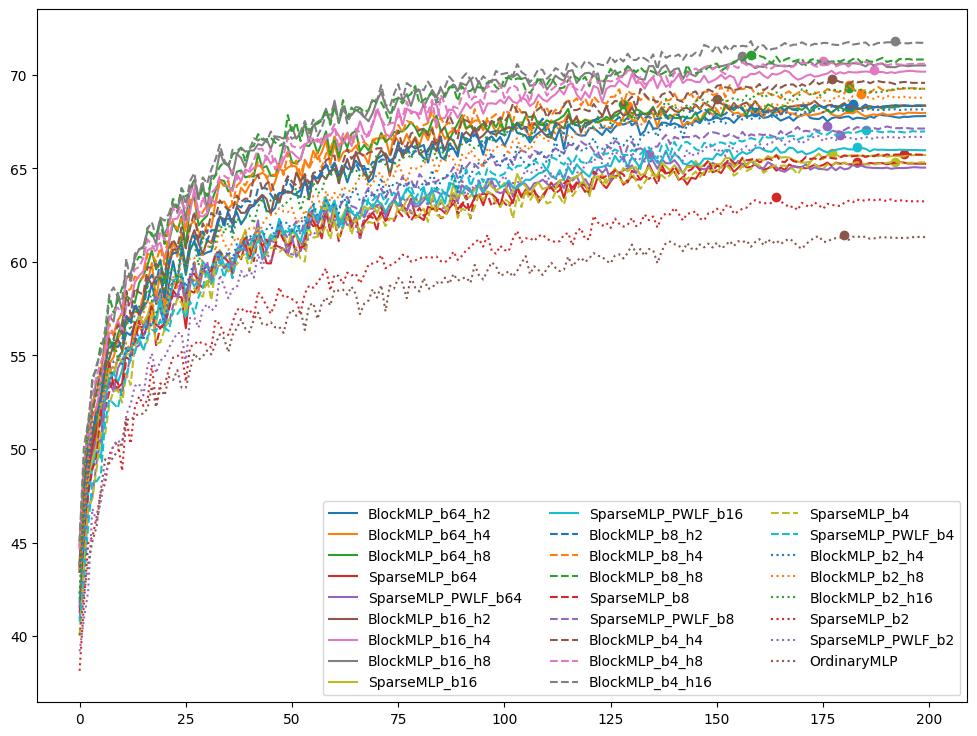

In [14]:
plt.figure(figsize=(12, 9))
for i, (model_name, stat) in enumerate(best_bench.items()):
    if i < 10:
        linestyle = None
    elif i < 20:
        linestyle='dashed'
    else:
        linestyle = 'dotted'

    acc = stat["test_acc"]
    plt.plot(acc, label=model_name[8:], linestyle=linestyle)
    plt.scatter(np.argmax(acc), np.max(acc))
plt.legend(ncol=3)

In [15]:
list(best_bench.keys())

['cifar10_BlockMLP_b64_h2',
 'cifar10_BlockMLP_b64_h4',
 'cifar10_BlockMLP_b64_h8',
 'cifar10_SparseMLP_b64',
 'cifar10_SparseMLP_PWLF_b64',
 'cifar10_BlockMLP_b16_h2',
 'cifar10_BlockMLP_b16_h4',
 'cifar10_BlockMLP_b16_h8',
 'cifar10_SparseMLP_b16',
 'cifar10_SparseMLP_PWLF_b16',
 'cifar10_BlockMLP_b8_h2',
 'cifar10_BlockMLP_b8_h4',
 'cifar10_BlockMLP_b8_h8',
 'cifar10_SparseMLP_b8',
 'cifar10_SparseMLP_PWLF_b8',
 'cifar10_BlockMLP_b4_h4',
 'cifar10_BlockMLP_b4_h8',
 'cifar10_BlockMLP_b4_h16',
 'cifar10_SparseMLP_b4',
 'cifar10_SparseMLP_PWLF_b4',
 'cifar10_BlockMLP_b2_h4',
 'cifar10_BlockMLP_b2_h8',
 'cifar10_BlockMLP_b2_h16',
 'cifar10_SparseMLP_b2',
 'cifar10_SparseMLP_PWLF_b2',
 'cifar10_OrdinaryMLP']

## Visualize Compact - Clean

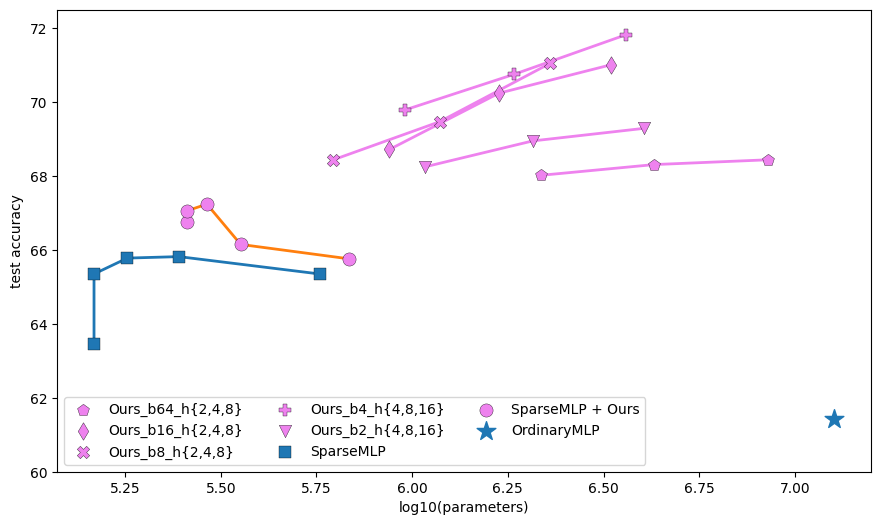

In [27]:
plt.figure(figsize=(10.5, 6))

## first plot the BlockMLP32
xs, ys = [], [] 
for i, h in enumerate([2, 4, 8]):
    c = ["blue", "blueviolet", "violet"][i]
    
    model = 'cifar10_BlockMLP_b64'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    if i == 0:
        plt.scatter(n_params, acc, label='Ours_b64_h{2,4,8}', marker='p', s=80, color='violet', edgecolor='k', lw=0.25)
    else:
        plt.scatter(n_params, acc, marker='p', s=80, color='violet', edgecolor='k', lw=0.25)
        
plt.plot(xs, ys, zorder=-1000, lw=2, color='violet')

### Plot for Block 16
xs, ys = [], [] 
for i, h in enumerate([2, 4, 8]):
    c = ["teal", "c", "cyan"][i]
    
    model = 'cifar10_BlockMLP_b16'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    if i == 0:
        plt.scatter(n_params, acc, label='Ours_b16_h{2,4,8}', marker='d', s=80, color='violet', edgecolor='k', lw=0.25)
    else:
        plt.scatter(n_params, acc, marker='d', s=80, color='violet', edgecolor='k', lw=0.25)

plt.plot(xs, ys, zorder=-1000, lw=2, color='violet')

### Plot for Block 8
xs, ys = [], [] 
for i, h in enumerate([2, 4, 8]):
    c = ["darkgreen", "limegreen", "springgreen"][i]

    model = 'cifar10_BlockMLP_b8'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    if i == 0:
        plt.scatter(n_params, acc, label='Ours_b8_h{2,4,8}', marker='X', s=80, color='violet', edgecolor='k', lw=0.25)
    else:
        plt.scatter(n_params, acc, marker='X', s=80, color='violet', edgecolor='k', lw=0.25)

plt.plot(xs, ys, zorder=-1000, lw=2, color='violet')


### Plot for Block 4
xs, ys = [], [] 
for i, h in enumerate([4, 8, 16]):
    c = ["olive", "y", "yellow"][i]

    model = 'cifar10_BlockMLP_b4'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    if i == 0:
        plt.scatter(n_params, acc, label='Ours_b4_h{4,8,16}', marker='P', s=80, color='violet', edgecolor='k', lw=0.25)
    else:
        plt.scatter(n_params, acc, marker='P', s=80, color='violet', edgecolor='k', lw=0.25)
    
plt.plot(xs, ys, zorder=-1000, lw=2, color='violet')


### Plot for Block 2
xs, ys = [], [] 
for i, h in enumerate([4, 8, 16]):
    c = ["chocolate", "darkorange", "bisque"][i]
    
    model = 'cifar10_BlockMLP_b2'+f'_h{h}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    if i == 0:
        plt.scatter(n_params, acc, label='Ours_b2_h{4,8,16}', marker='v', s=80, color='violet', edgecolor='k', lw=0.25)
    else:
        plt.scatter(n_params, acc, marker='v', s=80, color='violet', edgecolor='k', lw=0.25)
    
plt.plot(xs, ys, zorder=-1000, lw=2, color='violet')



# colors = ["tab:blue",
# "tab:orange",
# "tab:green",
# "tab:red",
# "tab:purple",
# "tab:brown",
# "tab:pink",
# "tab:gray",
# "tab:olive",
# "tab:cyan"]

### Plot for sparse Weights
xs, ys = [], [] 
for i, b in enumerate([2, 4, 8, 16, 64]):
    model = f'cifar10_SparseMLP_b{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    if i == 0:
        plt.scatter(n_params, acc, label=f'SparseMLP', marker='s', s=80, color="tab:blue", edgecolor='k', lw=0.25)
    else:
        plt.scatter(n_params, acc, marker='s', s=80, color="tab:blue", edgecolor='k', lw=0.25)
    
plt.plot(xs, ys, zorder=-1000, lw=2)

### Plot for sparse Weights + PWLF (b5)
xs, ys = [], [] 

for i, b in enumerate([2, 4, 8, 16, 64]):
    
    model = f'cifar10_SparseMLP_PWLF_b{b}'
    stat = best_bench[model]
    
    n_params = stat['num_param']
    n_params = np.log10(n_params)
    
    acc = np.max(stat["test_acc"])
    xs += [n_params]
    ys += [acc]
    if i ==0:
        plt.scatter(n_params, acc, label=f'SparseMLP + Ours', marker='o', s=90, color="violet", edgecolor='k', lw=0.25)
    else:
        plt.scatter(n_params, acc, marker='o', s=90, color="violet", edgecolor='k', lw=0.25)
    
plt.plot(xs, ys, zorder=-1000, lw=2)

# ### Plot for PWLF grids
# xs, ys = [], [] 
# for b in [3, 5]:
#     model = f'cifar10_PairPWLF_g{b}'
#     stat = best_bench[model]
    
#     n_params = stat['num_param']
#     n_params = np.log10(n_params)
    
#     acc = np.max(stat["test_acc"])
#     xs += [n_params]
#     ys += [acc]
#     plt.scatter(n_params, acc, label=model[8:], marker='x', s=100)
    
# plt.plot(xs, ys)

### For Ordinary MLP
model = f'cifar10_OrdinaryMLP'
stat = best_bench[model]

n_params = stat['num_param']
n_params = np.log10(n_params-(1/4*4096*4096))

acc = np.max(stat["test_acc"])

plt.scatter(n_params, acc, label="OrdinaryMLP", marker='*', s=200, color='g')
### The plot below plots for total params and equivalent parameters
### (dimension selector parameters are redundent)
# plt.scatter([n_params, n_params2], [acc, acc], label=model[8:], marker='x', s=100)
# plt.plot([n_params, n_params2], [acc, acc])

plt.ylim((60, 72.5))
# plt.ylim((64, 72.5))
# plt.ylim((54, 66))
# plt.ylim((58.5, 68))

plt.legend(loc=3, ncol=3)
plt.xlabel("log10(parameters)")
plt.ylabel("test accuracy")

plt.savefig(f"./models/new_{PREFIX}cifar10_nonlinear_mixer.pdf", bbox_inches='tight')